In [1]:
'''Read in Raw Data: Comments.csv'''

import pandas as pd
import json

comments_df= pd.read_csv ('C:\\Users\\asus\\Desktop\\4032\\From ajl\\comments.csv', usecols=[2,3,4,5],error_bad_lines=False)
videos_df=pd.read_csv('C:\\Users\\asus\\Desktop\\4032\\From ajl\\videos.csv', usecols=[2,5],error_bad_lines=False)
comments_df=pd.merge (comments_df, videos_df, on='video_id',how='left')
comments_df.drop_duplicates(inplace=True)

comments_df.head(5)

C:\Users\asus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,video_id,comment_text,likes,replies,category_id
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,24
14,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,24
28,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,24
42,XpVt6Z1Gjjo,MY FAN . attendance,3,0,24
56,XpVt6Z1Gjjo,trending 😉,3,0,24


In [2]:
'''Map category name into the dataframe'''

with open('C:\\Users\\asus\\Desktop\\4032\\From ajl\\GB_category_id.json') as json_file:
    gb_json = json.load(json_file)
    

id_to_category = {}
for i in gb_json['items']:
    category = i['snippet']['title']
    id = int(i['id'])
    id_to_category[id] = category
training_id = []
for i in id_to_category:
    training_id.append(i)

In [19]:
comments_df['category']=comments_df['category_id'].map(id_to_category)
comments_df = comments_df[comments_df['category_id']!= 29]
comments_df = comments_df[comments_df['category_id']!= 43]

main_df = []
for ID in training_id:
    this_category = []
    this_category.append(ID)
    this_category.append(id_to_category[ID])
    comment_str = ''
    this_category_comment = comments_df[comments_df['category_id']==ID]
    for index,row in this_category_comment.iterrows():
        try:
            comment_str = comment_str + this_category_comment.at[index,'comment_text']
        except:
            continue
    this_category.append(comment_str)
    main_df.append(this_category)

df = pd.DataFrame (main_df,columns= ['id','category','comments'])


In [20]:
df

,id,category,comments
0,1,Film & Animation,I'm sure I speak for everyone when I say the w...
1,2,Autos & Vehicles,"Imagine if Bernie was president,\n\n\n\n\n\n😃😃..."
2,10,Music,Trash and I like fergie but this shit is not g...
3,15,Pets & Animals,How does Mugumogu not collapse in a heap of la...
4,17,Sports,Wow I know these are just highlights but wow t...
5,18,Short Movies,
6,19,Travel & Events,Old Airport Road Hawker Center was AMAZING! Th...
7,20,Gaming,Yellow fever Parker & (((Stone))) revealed who...
8,21,Videoblogging,
9,22,People & Blogs,Love you Pewdiepie don't apologize your fineI ...


In [21]:
'''Select only those categories with large enough data'''

df=df.loc[[0,1,2,3,4,6,7,9,10,11,12,13,14,15]]

# Cleaning the text

In [22]:
import re
import string

df['comments'] = df['comments'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers'''
def clean_text(text):
    text= text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text
clean1= lambda x: clean_text(x)


df_clean = pd.DataFrame (df['comments'].apply(clean1))
df_clean['category'] = df['category']
df_clean=df_clean[['category','comments']]


In [23]:
df_clean

,category,comments
0,Film & Animation,im sure i speak for everyone when i say the wa...
1,Autos & Vehicles,imagine if bernie was presidentnnnnnni used to...
2,Music,trash and i like fergie but this shit is not g...
3,Pets & Animals,how does mugumogu not collapse in a heap of la...
4,Sports,wow i know these are just highlights but wow t...
6,Travel & Events,old airport road hawker center was amazing tha...
7,Gaming,yellow fever parker stone revealed who they r...
9,People & Blogs,love you pewdiepie dont apologize your finei a...
10,Comedy,nothings scarier than a guy replying to every ...
11,Entertainment,logan paul its yo big day ive been following y...


In [47]:
## Save to pickle file and open using pickle 

df_clean = pd.read_pickle ('df_clean.pkl')

In [48]:
'''Produce a document term matrix of words for each category '''
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(df_clean.comments)
data_dtm = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm['category'] = df_clean['category']
data_dtm = data_dtm.set_index('category')
data_dtm

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaa,aaaaaaaaaaa,...,𝗥𝗜𝗚𝗛𝗧,𝗦𝗟𝗜𝗖𝗘,𝘾𝙝𝙚𝙘𝙠,𝙘𝙤𝙤𝙡,𝙙𝙚𝙖𝙡𝙨,𝙙𝙞𝙨𝙘𝙤𝙪𝙣𝙩i,𝙤𝙪𝙩,𝙨𝙝𝙞𝙥𝙨,𝙬𝙖𝙧𝙚𝙝𝙤𝙪𝙨𝙚,𝙬𝙞𝙩𝙝
category,,,,,,,,,,,,,,,,,,,,,
Film & Animation,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Autos & Vehicles,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Music,64,44,5,4,6,4,1,1,4,3,...,0,0,0,0,0,0,0,0,0,0
Pets & Animals,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Sports,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Travel & Events,4,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gaming,4,1,3,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,2,4,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


# Let's visualize the results

In [49]:
# NUMBER 1 : WORD MAPPP
data=data_dtm.transpose()
data.head()

category,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,nan,Travel & Events,Gaming,nan,People & Blogs,Comedy,Entertainment,News & Politics,Howto & Style
aa,0,1,64,1,6,0,4,4,2,9,1,1,4,3
aaa,2,2,44,0,0,0,16,1,4,9,0,0,1,2
aaaa,0,0,5,0,0,0,0,3,0,3,0,0,0,0
aaaaa,0,0,4,1,0,0,0,1,0,2,0,0,0,0
aaaaaa,1,0,6,0,0,0,0,0,1,0,0,0,0,0


In [50]:
'''Create dictionary to count top 30 words in each category'''
top_dict = {}
for c in data.columns:
    try:
        top = data[c].sort_values(ascending = False).head(30)
        top_dict[c] = list(zip(top.index, top.values))
    except:
        continue
top_dict

{'Film & Animation': [('like', 3224),
  ('movie', 2471),
  ('just', 2311),
  ('im', 1418),
  ('love', 1408),
  ('dont', 1232),
  ('video', 1174),
  ('know', 1138),
  ('really', 1104),
  ('people', 1036),
  ('good', 1019),
  ('make', 985),
  ('think', 952),
  ('looks', 907),
  ('time', 876),
  ('trailer', 874),
  ('say', 830),
  ('want', 823),
  ('did', 773),
  ('watch', 708),
  ('new', 687),
  ('rick', 678),
  ('got', 675),
  ('wrong', 657),
  ('great', 652),
  ('going', 625),
  ('way', 549),
  ('didnt', 547),
  ('look', 546),
  ('need', 544)],
 'Autos & Vehicles': [('car', 652),
  ('like', 549),
  ('video', 403),
  ('just', 402),
  ('make', 277),
  ('cars', 244),
  ('dont', 216),
  ('engine', 206),
  ('good', 191),
  ('know', 182),
  ('love', 181),
  ('really', 176),
  ('im', 164),
  ('think', 155),
  ('way', 149),
  ('use', 146),
  ('going', 146),
  ('time', 143),
  ('got', 142),
  ('videos', 141),
  ('did', 141),
  ('new', 138),
  ('pilot', 133),
  ('people', 129),
  ('need', 127),


In [51]:
words = []

for category in data.columns:
    try:
        top = [word for (word, count) in top_dict[category]]
    except:
        # some categories has less than 30 top words
        pass
    for t in top:
        words.append(t)
words   

['like',
 'movie',
 'just',
 'im',
 'love',
 'dont',
 'video',
 'know',
 'really',
 'people',
 'good',
 'make',
 'think',
 'looks',
 'time',
 'trailer',
 'say',
 'want',
 'did',
 'watch',
 'new',
 'rick',
 'got',
 'wrong',
 'great',
 'going',
 'way',
 'didnt',
 'look',
 'need',
 'car',
 'like',
 'video',
 'just',
 'make',
 'cars',
 'dont',
 'engine',
 'good',
 'know',
 'love',
 'really',
 'im',
 'think',
 'way',
 'use',
 'going',
 'time',
 'got',
 'videos',
 'did',
 'new',
 'pilot',
 'people',
 'need',
 'fuel',
 'work',
 'thats',
 'great',
 'shit',
 'love',
 'song',
 'like',
 'just',
 'im',
 'video',
 'music',
 'good',
 'dont',
 'know',
 'really',
 'new',
 'great',
 'amazing',
 'time',
 'got',
 'voice',
 'best',
 'beautiful',
 'think',
 'make',
 'que',
 'people',
 'way',
 'songs',
 'want',
 'feel',
 'album',
 'need',
 'better',
 'like',
 'love',
 'just',
 'cat',
 'video',
 'im',
 'dont',
 'coyote',
 'got',
 'know',
 'dog',
 'cats',
 'really',
 'time',
 'think',
 'people',
 'animals',
 

In [52]:
'''Show words which appear most commonly across categories'''

from collections import Counter
Counter(words).most_common()

[('like', 14),
 ('just', 14),
 ('im', 14),
 ('love', 14),
 ('dont', 14),
 ('video', 14),
 ('know', 14),
 ('really', 14),
 ('people', 14),
 ('good', 14),
 ('make', 14),
 ('think', 14),
 ('time', 14),
 ('want', 13),
 ('great', 13),
 ('did', 12),
 ('got', 11),
 ('going', 11),
 ('need', 11),
 ('way', 10),
 ('looks', 6),
 ('say', 6),
 ('new', 6),
 ('videos', 6),
 ('look', 5),
 ('thats', 5),
 ('best', 5),
 ('feel', 4),
 ('better', 4),
 ('watch', 3),
 ('didnt', 3),
 ('use', 3),
 ('beautiful', 3),
 ('que', 3),
 ('game', 3),
 ('man', 3),
 ('play', 3),
 ('guy', 3),
 ('youre', 3),
 ('ive', 3),
 ('life', 3),
 ('movie', 2),
 ('shit', 2),
 ('amazing', 2),
 ('team', 2),
 ('hes', 2),
 ('fan', 2),
 ('en', 2),
 ('win', 2),
 ('soap', 2),
 ('guys', 2),
 ('world', 2),
 ('trailer', 1),
 ('rick', 1),
 ('wrong', 1),
 ('car', 1),
 ('cars', 1),
 ('engine', 1),
 ('pilot', 1),
 ('fuel', 1),
 ('work', 1),
 ('song', 1),
 ('music', 1),
 ('voice', 1),
 ('songs', 1),
 ('album', 1),
 ('cat', 1),
 ('coyote', 1),
 ('dog'

In [53]:
'''Make stop words include those words which appear most commonly in over half the categories'''

add_stop_words = [word for word, count in Counter(words).most_common() if count > 7]
add_stop_words

['like',
 'just',
 'im',
 'love',
 'dont',
 'video',
 'know',
 'really',
 'people',
 'good',
 'make',
 'think',
 'time',
 'want',
 'great',
 'did',
 'got',
 'going',
 'need',
 'way']

In [54]:
'''Re-construct the dtm with new stop words'''

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

stop_words = text.ENGLISH_STOP_WORDS.union (add_stop_words)
cv=CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df_clean.comments)
data_stop = pd.DataFrame (data_cv.toarray(),columns=cv.get_feature_names())

data_stop['category']=df['category']
data_stop = data_stop.set_index('category')
data_stop

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaa,aaaaaaaaaaa,...,𝗥𝗜𝗚𝗛𝗧,𝗦𝗟𝗜𝗖𝗘,𝘾𝙝𝙚𝙘𝙠,𝙘𝙤𝙤𝙡,𝙙𝙚𝙖𝙡𝙨,𝙙𝙞𝙨𝙘𝙤𝙪𝙣𝙩i,𝙤𝙪𝙩,𝙨𝙝𝙞𝙥𝙨,𝙬𝙖𝙧𝙚𝙝𝙤𝙪𝙨𝙚,𝙬𝙞𝙩𝙝
category,,,,,,,,,,,,,,,,,,,,,
Film & Animation,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Autos & Vehicles,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Music,64,44,5,4,6,4,1,1,4,3,...,0,0,0,0,0,0,0,0,0,0
Pets & Animals,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Sports,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Travel & Events,4,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gaming,4,1,3,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,2,4,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [55]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

cat_names = df_clean['category'].tolist()

df_clean.set_index('category',inplace=True)
df_clean

,comments
category,
Film & Animation,im sure i speak for everyone when i say the wa...
Autos & Vehicles,imagine if bernie was presidentnnnnnni used to...
Music,trash and i like fergie but this shit is not g...
Pets & Animals,how does mugumogu not collapse in a heap of la...
Sports,wow i know these are just highlights but wow t...
Travel & Events,old airport road hawker center was amazing tha...
Gaming,yellow fever parker stone revealed who they r...
People & Blogs,love you pewdiepie dont apologize your finei a...
Comedy,nothings scarier than a guy replying to every ...


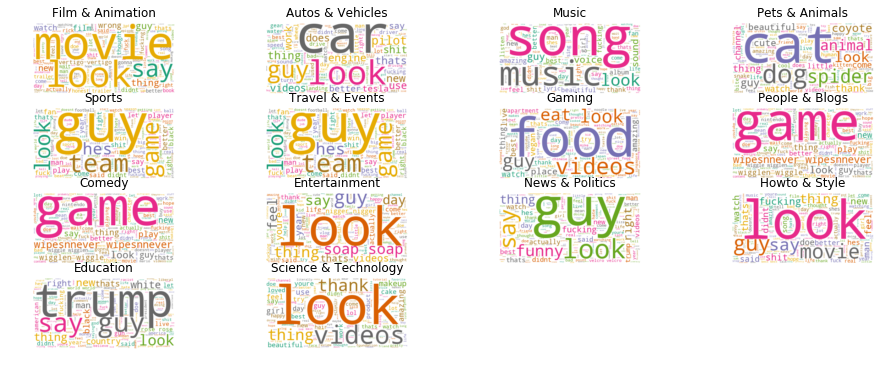

In [56]:
for index, cat in enumerate(data.columns):
    try:
        wc.generate(df_clean.comments[cat])
    except:
        pass
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(cat_names[index])
    
plt.show()

In [57]:
# NUMBER 2: Amount of profanity
data_bad_words = pd.DataFrame (data= data_stop.transpose())
data_bad_words = data_bad_words.loc[['fucking','fuck', 'shit']]
data_bad_words = data_bad_words.transpose()
data_bad_words['f_word'] = data_bad_words['fucking']+data_bad_words['fuck']
data_bad_words

,fucking,fuck,shit,f_word
category,,,,
Film & Animation,466,322,396,788
Autos & Vehicles,89,60,115,149
Music,1456,1659,1588,3115
Pets & Animals,19,16,7,35
Sports,430,576,627,1006
NaN,21,5,4,26
Travel & Events,268,177,281,445
Gaming,962,695,942,1657
NaN,1077,619,780,1696


KeyError: 'Education'

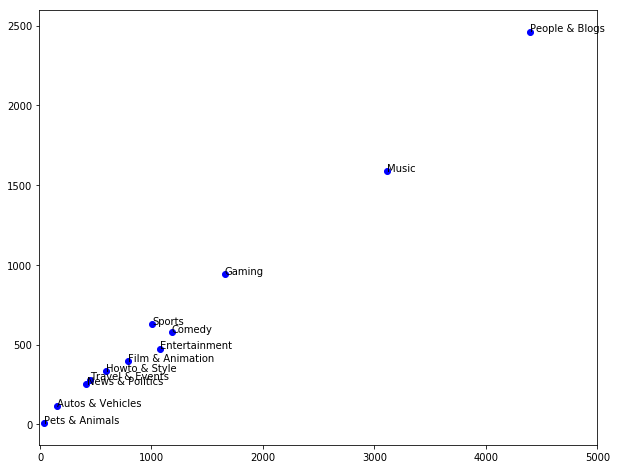

In [58]:
plt.rcParams['figure.figsize'] = [10, 8]

for i in range(len(cat_names)):
    x = data_bad_words.f_word.loc[cat_names[i]]
    y = data_bad_words.shit.loc[cat_names[i]]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, cat_names[i], fontsize=10)
    plt.xlim(-5, 5000) 
    
plt.title('Number of Bad Words', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()